<a href="https://colab.research.google.com/github/MarcoM95/MLPNS2021/blob/main/MLPNS2021_ClassStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pylab as plt
from numpy import random

(array([ 1.,  8.,  8., 19., 17., 21., 11.,  8.,  4.,  3.]),
 array([-2.06905674, -1.63257787, -1.196099  , -0.75962013, -0.32314126,
         0.11333761,  0.54981648,  0.98629535,  1.42277422,  1.85925308,
         2.29573195]),
 <a list of 10 Patch objects>)

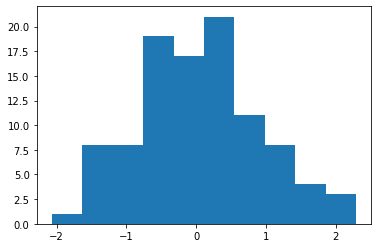

In [43]:
plt.hist(np.random.randn(100))

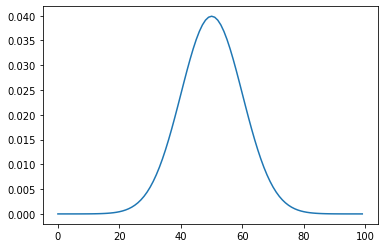

In [44]:
def mygauss(x, mu, sig):
  return 1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))

x   = np.arange(100)
mu  = 50.
sig = 10.
mygauss(x,mu,sig);

plt.plot(x,mygauss(x,mu,sig))

In [45]:
import scipy as sp
from scipy import stats

(array([ 2.,  2.,  9., 17., 16., 14., 11., 16.,  8.,  5.]),
 array([ 97.20141089,  97.72050633,  98.23960177,  98.75869721,
         99.27779264,  99.79688808, 100.31598352, 100.83507895,
        101.35417439, 101.87326983, 102.39236527]),
 <a list of 10 Patch objects>)

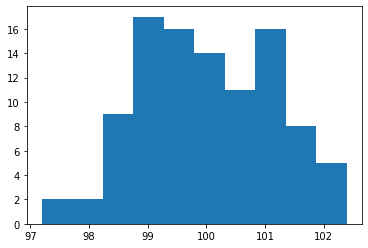

In [61]:
np.random.seed(123)                       # fix seed
plt.hist(sp.stats.norm.rvs(100,size=100)) # Gaussian with Mean = 100

In [62]:
np.random.seed?

In [64]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence